In [110]:
import pandas as pd 
import numpy as np 
from tensorflow.keras import Sequential #This is for stacking the layers 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, LeakyReLU
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import kernel_metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

### **Importing and loading the CIFAR dataset**

In [84]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [85]:
# load the X_train set
x_train.shape 

(50000, 32, 32, 3)

Deduction 
Here, the dimension is of 4 with 50000 images in the train set; image size of 32 x 32pixels and 3nos channels (RGB ) 

In [86]:
# The y_train set has 5000images and in 1D array 
y_train.shape 

(50000, 1)

In [87]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

We can see above  that the y_train isnt in 1D array but 2D array hence need to rescale 


Rescaling can be done using y_train.reshape(-1,) Since the 5000 is meant to be the same; so -1 makes it same and we leave the other.   

Using to_categorical
If dot rescaling method used then the loss function during compiling will e sparse categorical cross entropy but if to_categorical which turns to one hot encoding, then categorical cross entropy will be used as loss function. 
If rescaled, it will return as a single array containing the image class 

In [88]:
# iamges correspond to this class  
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 


In [89]:
# rescale and can see that it returned the actual class in the first five position of the train set 
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [90]:
# If to categorical
# y_train = to_categorical(y_train) - This will return array in 2D array and in probaility for each array. Each array representing probabilities  


In [91]:
len (x_train[0]) 

32

In [92]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Text(0.5, 0, 'frog')

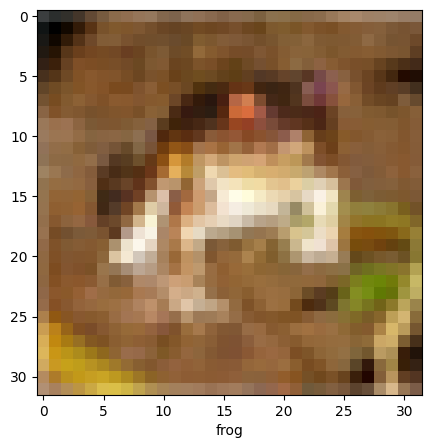

In [93]:
# View image 
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 
plt.figure(figsize=(8,5))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0]]) # y_train[0] will return a value and this value corresponds to the index. Say in index 0 is the frog which corresponds to class - 5


In [94]:
def plot_image (x, y, index ): 
  plt.figure(figsize=(8,5))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y_train[index]])

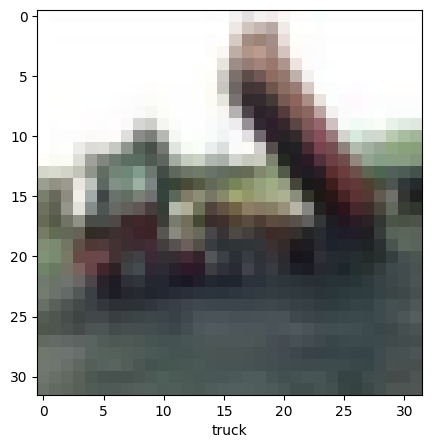

In [95]:
plot_image(x_train, y_train, 2)

In [96]:
# Normalize the image size with max image size 225 
x_train = x_train/255
x_test = x_test/255 

## BUILD MODEL WITH ANN 

In [117]:
model = Sequential()
model.add(Flatten(input_shape = (32, 32, 3))) # ANN is the fully connnted dense layer part; here, the convolution expunge and we just f;latten into the ANN network 
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"] )


In [112]:
es = EarlyStopping( monitor = "val_loss", mode = "min", patience = 3, verbose = 2)
ck = ModelCheckpoint("cnn_model.hdf5", monitor = "val_loss", save_best_only = True, save_weight_only =True)

In [118]:
result = model.fit ( x_train, y_train, batch_size= 32, epochs = 50, validation_split = 0.2, verbose =2, callbacks = [es, ck], shuffle = True)

Epoch 1/50
1250/1250 - 5s - loss: 1.9353 - accuracy: 0.3057 - val_loss: 1.8436 - val_accuracy: 0.3402 - 5s/epoch - 4ms/step
Epoch 2/50
1250/1250 - 4s - loss: 1.7642 - accuracy: 0.3789 - val_loss: 1.7440 - val_accuracy: 0.3896 - 4s/epoch - 4ms/step
Epoch 3/50
1250/1250 - 4s - loss: 1.6919 - accuracy: 0.4029 - val_loss: 1.7027 - val_accuracy: 0.3977 - 4s/epoch - 4ms/step
Epoch 4/50
1250/1250 - 4s - loss: 1.6419 - accuracy: 0.4225 - val_loss: 1.7076 - val_accuracy: 0.3978 - 4s/epoch - 3ms/step
Epoch 5/50
1250/1250 - 4s - loss: 1.6094 - accuracy: 0.4329 - val_loss: 1.6458 - val_accuracy: 0.4173 - 4s/epoch - 3ms/step
Epoch 6/50
1250/1250 - 4s - loss: 1.5796 - accuracy: 0.4428 - val_loss: 1.6536 - val_accuracy: 0.4200 - 4s/epoch - 3ms/step
Epoch 7/50
1250/1250 - 5s - loss: 1.5540 - accuracy: 0.4528 - val_loss: 1.5823 - val_accuracy: 0.4506 - 5s/epoch - 4ms/step
Epoch 8/50
1250/1250 - 5s - loss: 1.5350 - accuracy: 0.4592 - val_loss: 1.5865 - val_accuracy: 0.4421 - 5s/epoch - 4ms/step
Epoch 9/

In [123]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.935280,0.305675,1.843638,0.3402
1,1.764205,0.378875,1.744004,0.3896
2,1.691861,0.402875,1.702721,0.3977
3,1.641932,0.422475,1.707562,0.3978
4,1.609380,0.432950,1.645776,0.4173
5,1.579603,0.442850,1.653602,0.4200
6,1.553997,0.452775,1.582316,0.4506
7,1.535007,0.459200,1.586462,0.4421
8,1.518088,0.464425,1.575734,0.4421
9,1.500324,0.472775,1.568908,0.4481


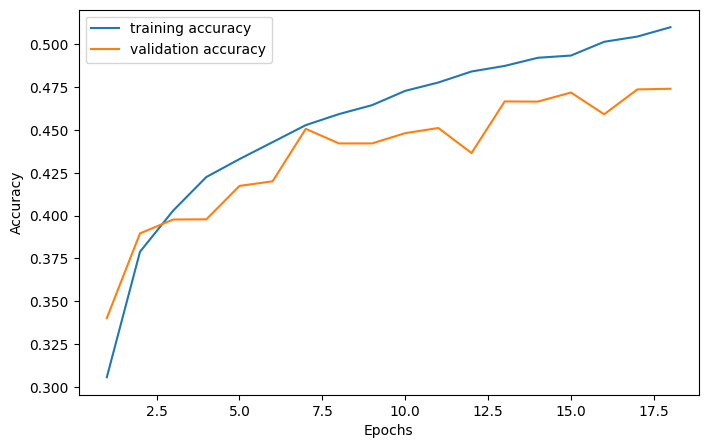

In [127]:
val_acc = result.history["val_accuracy"]
acc = result.history["accuracy"]
epochs = range(1, len(acc) + 1) 
# epochs = range (1,10)
plt.figure(figsize = (8,5))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.legend( loc ="best") # this is to place the plot label at best position 
plt.xlabel ("Epochs")
plt.ylabel("Accuracy")
plt.show() 

Conclusion 

Its is clear that using ANN for Multiclass Image recognition task will not improve performance on network; hence poor classification.

From the graph, we can see that the maximum accuracy reached on training is about 50% while on validation the performance never showed any form of improvement as it lags 

So, CNN Model best preferred for this kind of task 

### GREAT JOB!!!